In [156]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
from helpers.methods import *

In [111]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [112]:
data = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14263,0.0,1.0,0.0,1.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0,0.0,8.0,5.0,7.0
14264,0.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,30.0,0.0,1.0,2.0,6.0,2.0
14265,1.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,9.0,6.0,8.0
14266,1.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,5.0,0.0,1.0,10.0,2.0,3.0


In [113]:
data = data.dropna()

In [114]:
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     55
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [115]:
data['BMI'].min()

14.0

In [116]:
data['BMI'].max()

85.0

<AxesSubplot:xlabel='BMI', ylabel='Count'>

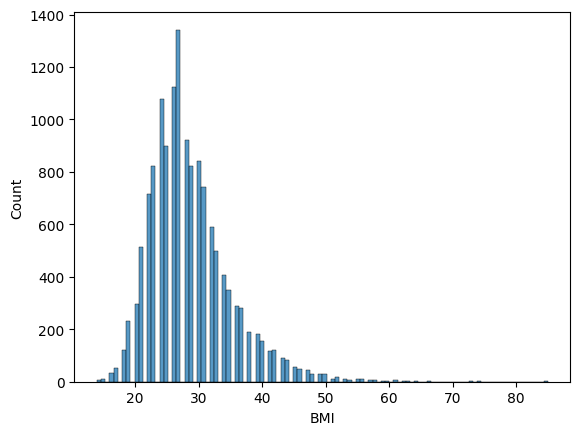

In [117]:
sns.histplot(data['BMI'])

In [118]:
print(len(data))
data = data[data.BMI<55].copy()
print(len(data))


14267
14212


In [119]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## BMI

In [120]:
def bin_BMI(BMI):
    if BMI < 18.5:
        # underweight
        return 0.0
    elif BMI <= 24.9:
        # normal
        return 1.0
    elif BMI <= 29.9:
        # overweight
        return 2.0
    elif BMI <= 39.9:
        # obese
        return 3.0
    elif BMI >=39.9:
        # severely obese
        return 4.0
    else:
        return 5.0
    
data['bmi_bin'] = data['BMI'].apply(lambda t: bin_BMI(t))

In [121]:
data.groupby('bmi_bin').count()['BMI']

bmi_bin
0.0     224
1.0    3655
2.0    5111
3.0    4368
4.0     854
Name: BMI, dtype: int64

In [122]:
data = data.drop('BMI', axis=1)

In [123]:
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
bmi_bin                  5
dtype: int64

## Age

In [124]:
data['Age'].min()

1.0

In [125]:
data['Age'].max()

13.0

<AxesSubplot:xlabel='Age', ylabel='Count'>

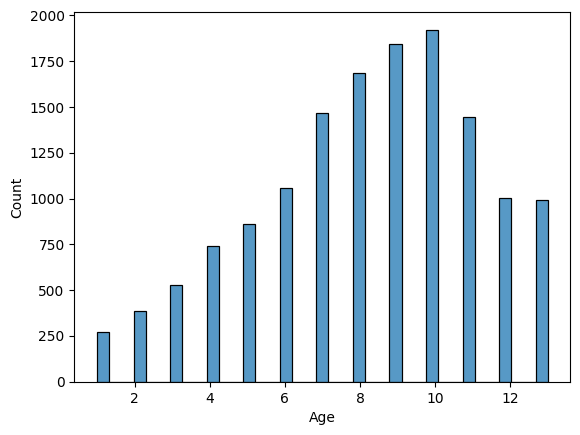

In [126]:
sns.histplot(data['Age'])

'Age 18 to 24' -> 1   young
'Age 25 to 29' -> 2   young
'Age 30 to 34' -> 3   adult
'Age 35 to 39' -> 4   adult
'Age 40 to 44' -> 5   adult
'Age 45 to 49' -> 6   adult
'Age 50 to 54' -> 7   early-seniors
'Age 55 to 59' -> 8   early-seniors
'Age 60 to 64' -> 9   early-seniors
'Age 65 to 69' -> 10  senior
'Age 70 to 74' -> 11  senior
'Age 75 to 79' -> 12  senior
'Age 80 & older'-> 13 senior

In [127]:
def bin_Age(age_bin):
    if age_bin <=2:
        return 0.0
    elif age_bin <=6:
        return 1.0
    elif age_bin <= 9:
        return 2.0
    else:
        return 3.0
    
data['age_bin'] = data['Age'].apply(lambda t: bin_Age(t))

In [128]:
data.groupby('age_bin').count()['Age']

age_bin
0.0     658
1.0    3192
2.0    4998
3.0    5364
Name: Age, dtype: int64

In [129]:
data = data.drop('Age', axis=1)

## Mental Health

<AxesSubplot:xlabel='MentHlth', ylabel='Count'>

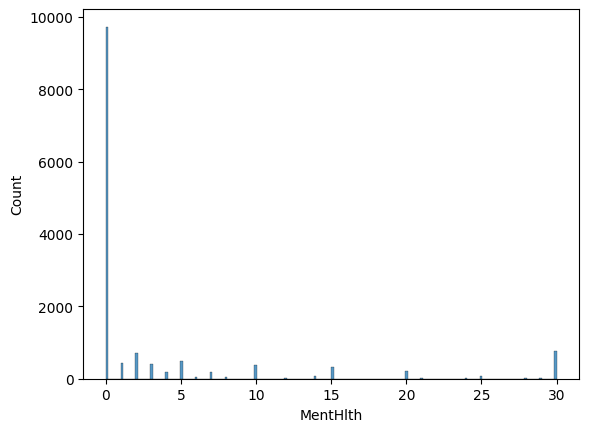

In [130]:
sns.histplot(data['MentHlth'])

In [131]:
sorted(data['MentHlth'].unique().tolist())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [132]:
def bin_MentHlth(health):
    if health <=0.0:
        return 0.0
    else:
        return 1.0

data['mental_health_bin'] = data['MentHlth'].apply(lambda t: bin_MentHlth(t))

## Physical Health

<AxesSubplot:xlabel='PhysHlth', ylabel='Count'>

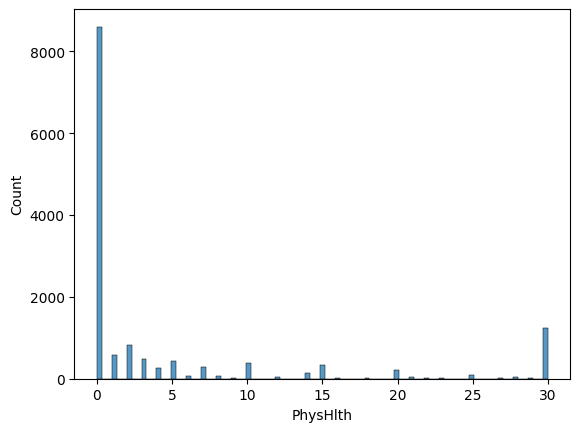

In [133]:
sns.histplot(data['PhysHlth'])

In [134]:
sorted(data['PhysHlth'].unique().tolist())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0]

In [135]:
def bin_PhysHlth(health):
    if health <=0.0:
        return 0.0
    else:
        return 1.0

data['physical_health_bin'] = data['PhysHlth'].apply(lambda t: bin_PhysHlth(t))

## Genetic Health

<AxesSubplot:xlabel='GenHlth', ylabel='Count'>

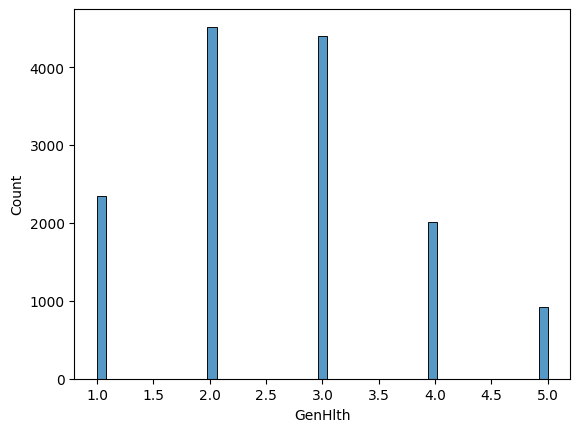

In [136]:
sns.histplot(data['GenHlth'])

## Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

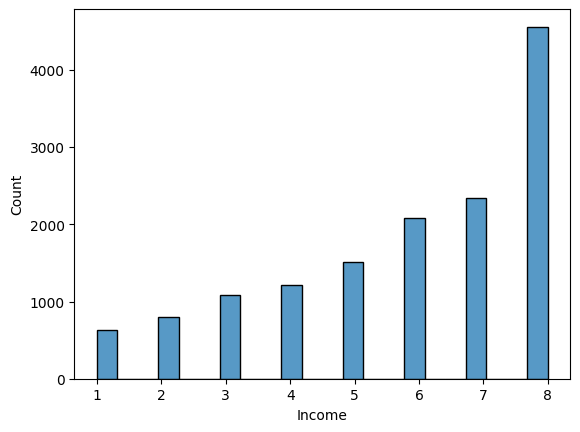

In [137]:
sns.histplot(data["Income"])

In [138]:
data["Income"].unique().tolist()

[3.0, 1.0, 8.0, 6.0, 4.0, 7.0, 2.0, 5.0]

'Less than $10,000'            -> 0
'$10,000 to less than $15,000' -> 0
'$15,000 to less than $20,000' -> 0
'$20,000 to less than $25,000' -> 0
'$25,000 to less than $35,000' -> 1  
'$35,000 to less than $50,000' -> 1
'$50,000 to less than $75,000' -> 2
'$75,000 or more'              -> 3

In [139]:
def bin_Income(income):
    if income <=4:
        return 0.0
    elif income <=6:
        return 1.0
    elif income == 7:
        return 2.0
    else:
        return 3.0

data['income_bin'] = data['Income'].apply(lambda t: bin_Income(t))

In [140]:
data = data.drop('Income', axis=1)

## Education

In [141]:
data["Education"].unique().tolist()

[4.0, 6.0, 3.0, 5.0, 2.0, 1.0]

'Never attended school or only kingdergarten',
'Elementary school',
'Some high school',
'High school graduate',
'Some college or technical school',
'4 years college or higher']

In [142]:
def bin_Education(education):
    if education <=2.0:
        return 0.0
    elif education <=4.0:
        return 1.0
    elif education <= 5.0:
        return 2.0
    else:
        return 3.0
data['education_bin'] = data['Education'].apply(lambda t: bin_Education(t))

<AxesSubplot:xlabel='Education', ylabel='Count'>

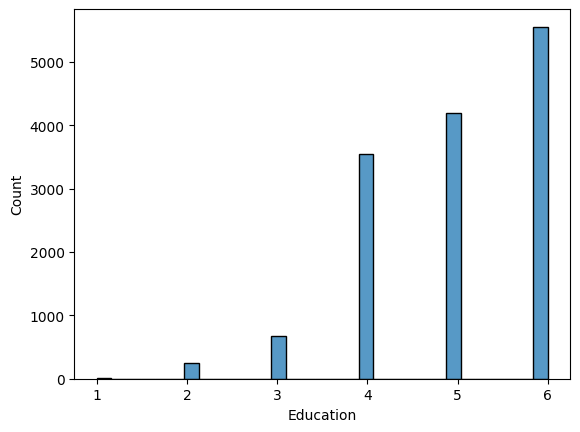

In [143]:
sns.histplot(data["Education"])

<AxesSubplot:xlabel='education_bin', ylabel='Count'>

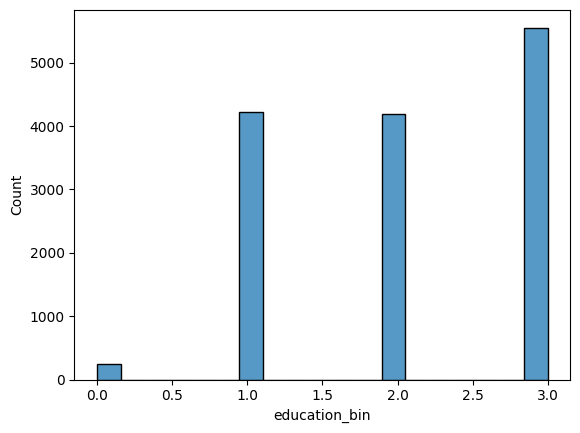

In [144]:
sns.histplot(data["education_bin"])

In [145]:
data = data.drop('Education', axis=1)

## Target

In [168]:
data.groupby('Diabetes_binary').count()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,bmi_bin,age_bin,mental_health_bin,physical_health_bin,income_bin,education_bin
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,,,
0.0,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909,11909
1.0,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303


In [146]:
data.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
bmi_bin                  5
age_bin                  4
mental_health_bin        2
physical_health_bin      2
income_bin               4
education_bin            4
dtype: int64

In [148]:
data.columns.tolist()

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'bmi_bin',
 'age_bin',
 'mental_health_bin',
 'physical_health_bin',
 'income_bin',
 'education_bin']

## Train-Test Split

In [169]:
features = ['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'bmi_bin',
 'age_bin',
 'mental_health_bin',
 'physical_health_bin',
 'income_bin',
 'education_bin']

target = "Diabetes_binary"

In [203]:
X = data[features]
y = data[target]

In [204]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (11369, 23) (11369,)
Testing data shape: (2843, 23) (2843,)


In [205]:
colNames = features

In [206]:
X_train_bcc, X_test_bcc, new_cols = Binary_Cross_Combination(colNames, X_train, X_test, OneHot=True)

In [207]:
X_train_bcc.shape

(11369, 4480)

## Feature Elimination

In [208]:
print("Number of Features:", X_train_bcc.shape[1])

Number of Features: 4480


### Variance Threshold

In [209]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit(X_train_bcc)
CrossComb_cols = X_train_bcc.columns[sel.variances_ > 0.0099]

In [210]:
len(CrossComb_cols)

1842

### ChiSquare

In [211]:
from sklearn.feature_selection import chi2
chi2(X_train_bcc[CrossComb_cols], y_train)
chi2_p = chi2(X_train_bcc[CrossComb_cols], y_train)[1]

chi2_CrossComb_cols = []

for pValue, colname in zip(chi2_p, CrossComb_cols):
    if pValue < 0.01:
        chi2_CrossComb_cols.append(colname)

print(len(chi2_CrossComb_cols))

1300


## MODELING

### Upsampling with SMOTE

In [212]:
X_train_bcc = X_train_bcc[chi2_CrossComb_cols]
X_test_bcc = X_test_bcc[chi2_CrossComb_cols]
X_train_bcc.shape

(11369, 1300)

In [213]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bcc, y_train_bcc = smote.fit_resample(X_train_bcc, y_train)

In [214]:
X_train_bcc.shape

(19042, 1300)

In [215]:
y_train_bcc.shape

(19042,)

### Modeling with LR, XGB, LGBM

In [216]:
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [221]:
models = [#DecisionTreeClassifier(),RandomForestClassifier(),SVC(),
          LogisticRegression(),XGBClassifier(),LGBMClassifier()]
scoring = ['accuracy','f1','precision','recall','neg_log_loss']
models_columns = ['Name','fit_time','test_accuracy',
                  'test_f1','test_precision',
                 'test_recall','test_log_loss']
models_chart = pd.DataFrame(columns = models_columns)

row_index = 0
for idx, model in enumerate(models):
    model_name = model.__class__.__name__
    models_chart.loc[row_index,'Name'] = model_name
    
    cv_results = cross_validate(model,
                                X_train_bcc,
                                y_train_bcc,
                                cv =3,
                                scoring = scoring,
                                return_train_score = True
                                n_jobs=13)
    models_chart.loc[row_index,'fit_time'] = cv_results['fit_time'].mean()
    models_chart.loc[row_index,'test_accuracy'] = cv_results['test_accuracy'].mean()
    #models_chart.loc[row_index,'train_accuracy'] = cv_results['train_accuracy'].mean()
    models_chart.loc[row_index,'test_f1'] = cv_results[ 'test_f1'].mean()
    #models_chart.loc[row_index,'train_f1'] = cv_results['train_f1'].mean()
    models_chart.loc[row_index,'test_precision'] = cv_results['test_precision'].mean()
    #models_chart.loc[row_index,'train_precision'] = cv_results['train_precision'].mean()
    models_chart.loc[row_index,'test_recall'] = cv_results['test_recall'].mean()
    #models_chart.loc[row_index,'train_recall'] = cv_results['train_recall'].mean()
    models_chart.loc[row_index,'test_log_loss'] = -cv_results['test_neg_log_loss'].mean()
    
    row_index +=1
    
    models[idx] = model

models_chart.sort_values(by='test_accuracy',ascending = False)

,Name,fit_time,test_accuracy,test_f1,test_precision,test_recall,test_log_loss
1,XGBClassifier,70.885925,0.871345,0.834176,0.940945,0.807393,0.53398
2,LGBMClassifier,14.183113,0.870715,0.833091,0.940841,0.806238,0.431427
0,LogisticRegression,2.916375,0.77077,0.779879,0.749837,0.812732,0.491587


## Ensembling Models

In [222]:
# Stacking
# probabilities of estimation on train dataset
xgb = XGBClassifier()
lgbm = LGBMClassifier()

xgb.fit(X_train_bcc, y_train_bcc)
lgbm.fit(X_train_bcc, y_train_bcc)

train_prediction1_proba = lgbm.predict_proba(X_train_bcc)[:, 1]
train_prediction2_proba = xgb.predict_proba(X_train_bcc)[:, 1]

# probabilities of estimation on test dataset
test_prediction1_proba = lgbm.predict_proba(X_test_bcc)[:, 1]
test_prediction2_proba = xgb.predict_proba(X_test_bcc)[:, 1]

# stack the probabilities on train and the probabilities on test
train_stack = np.vstack([[train_prediction1_proba], 
                         [train_prediction2_proba]]).T

test_stack = np.vstack([[test_prediction1_proba], 
                        [test_prediction2_proba]]).T

In [229]:
len(stacked_y)

19042

In [231]:
len(y_train_bcc)

19042

In [224]:
stacked_y = [1 if (y1+y2)/2>0.5 else 0 for y1, y2 in train_stack]

In [236]:
sum([1 if y_actual==y_pred else 0 for y_actual, y_pred in zip(y_train_bcc, stacked_y)])/len(y_train_bcc)

0.9478521163743304

## MODEL SELECTION

## HYPER-PARAMETER TUNING